In [1]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import xlrd
pd.options.display.max_rows = 144
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import fuzzywuzzy as fw
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline


In [2]:
pip install fuzzywuzzy

sqlalchemy-migrate 0.12.0 has requirement SQLAlchemy>=0.9.6, but you'll have sqlalchemy 0.7.10 which is incompatible.
You are using pip version 10.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
df_char = pd.read_csv('Char.csv',encoding= 'latin-1')

In [4]:
df_char.head()

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Birth,Death
0,1,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,Half-blood,Black,Bright green,Albus Dumbledore | Dumbledore's Army | Order o...,Parseltongue| Defence Against the Dark Arts | ...,31 July 1980,NaN
1,2,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,Pure-blood,Red,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Wizard chess | Quidditch goalkeeping,1 March 1980,NaN
2,3,Hermione Jean Granger,Female,Student,Gryffindor,"10Â¾"" vine wood dragon heartstring",Otter,Human,Muggle-born,Brown,Brown,Dumbledore's Army | Order of the Phoenix | Hog...,Almost everything,"19 September,Â 1979",NaN
3,4,Albus Percival Wulfric Brian Dumbledore,Male,Headmaster,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,Human,Half-blood,Silver| formerly auburn,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Considered by many to be one of the most power...,Late August 1881,"30 June,Â 1997"
4,5,Rubeus Hagrid,Male,Keeper of Keys and Grounds | Professor of Care...,Gryffindor,"16"" Oak unknown core",None,Half-Human/Half-Giant,Part-HumanÂ (Half-giant),Black,Black,Albus Dumbledore | Order of the Phoenix | Hogw...,Resistant to stunning spells| above average st...,6 DecemberÂ 1928,NaN


In [5]:
df1 = pd.read_csv("HP1.csv",encoding = 'latin-1')

In [6]:
df2 = pd.read_csv("HP2.csv",encoding = 'latin-1')

In [7]:
df3 = pd.read_csv("HP3.csv",encoding = 'latin-1')

In [8]:
df_potion = pd.read_csv("Potions.csv",encoding = 'latin-1')

In [9]:
df_spell = pd.read_csv("Spells.csv",encoding = 'latin-1')

In [10]:
df1.head()

,Character,Sentence
0,Dumbledore,"I should've known that you would be here, Prof..."
1,McGonagall,"Good evening, Professor Dumbledore."
2,McGonagall,"Are the rumors true, Albus?"
3,Dumbledore,"I'm afraid so, professor."
4,Dumbledore,The good and the bad.


In [11]:
df1.Character = df1.Character.str.strip()

In [12]:
df1.Character.value_counts()

Harry            330
Hagrid           215
Ron              210
Hermione         170
Dumbledore        75
McGonagall        64
Petunia           45
Vernon            37
Quirrell          36
Malfoy            36
Snape             33
Voldemort         26
Madam Hooch       25
Oliver            24
Percy             23
Filch             22
Ollivander        20
Sorting Hat       19
Neville           16
Dudley            15
Firenze           14
Flitwick          13
Lee Jordan        12
Seamus            11
Mrs. Weasley      11
Sir Nicholas       8
George             7
Boy                7
Fred               7
Griphook           5
Girl               5
Man                5
Class              4
Ron and Harry      3
BarkeepÂ Tom       3
Hermoine           3
Trainmaster        2
Lee  Jordan        2
Draco              2
Goblin             2
Witch              2
All                2
Flint              2
Crowd              2
Man in paint       1
Dean               1
Whispers           1
Fat Lady     

In [13]:
df1.Character = df1.Character.str.replace('Hermoine', 'Hermione',regex = True)

In [14]:
df1.Character = df1.Character.str.replace('OIiver', 'Oliver',regex = True)

In [15]:
df1.Character = df1.Character.str.replace('Draco', 'Malfoy',regex = True)

In [95]:
df1counts = df1.Character.value_counts().to_frame('counts')
df1counts = df1counts.rename(columns={'counts' : 'book1'})
df1counts = df1counts.reset_index()
df1counts.head()

,index,book1
0,Harry,330
1,Hagrid,215
2,Ron,210
3,Hermione,173
4,Dumbledore,75


In [17]:
df2.Character = df2.Character.str.strip()

In [18]:
df2.Character.value_counts()

HARRY                       390
RON                         175
HERMIONE                    122
GILDEROY LOCKHART           113
DUMBLEDORE                   88
HAGRID                       82
LUCIUS MALFOY                75
TOM RIDDLE                   70
DOBBY                        69
MCGONAGALL                   66
DRACO                        55
MRS. WEASLEY                 54
UNCLE VERNON                 32
SNAPE                        27
MOANING MYRTLE               25
MR. WEASLEY                  21
FILCH                        21
ARAGOG                       20
PROFESSOR SPROUT             20
VOICE                        16
WOOD                         14
MADAM POMFREY                13
MR. BORGIN                   10
FUDGE                        10
PERCY                         9
LOCKHART                      8
NEVILLE                       8
FRED                          7
GINNY                         6
PHOTOGRAPHER                  6
SIR NICHOLAS                  6
DUDLEY  

In [19]:
df2.Character = df2.Character.str.replace('UNCLE VERNON', 'VERNON',regex = True)

In [20]:
df2.Character = df2.Character.str.replace('AUNT PETUNIA', 'PETUNIA',regex = True)
df2.Character = df2.Character.str.replace('GILDEROY LOCKHART', 'LOCKHART',regex = True)


In [98]:
df2.Character = df2.Character.str.replace('DRACO', 'MALFOY',regex = True)

In [99]:
df2.Character.value_counts()

HARRY                       390
RON                         175
HERMIONE                    122
LOCKHART                    121
DUMBLEDORE                   88
HAGRID                       82
LUCIUS MALFOY                75
TOM RIDDLE                   70
DOBBY                        69
MCGONAGALL                   66
MALFOY                       55
MRS. WEASLEY                 54
VERNON                       34
SNAPE                        27
MOANING MYRTLE               25
MR. WEASLEY                  21
FILCH                        21
PROFESSOR SPROUT             20
ARAGOG                       20
VOICE                        16
WOOD                         14
MADAM POMFREY                13
MR. BORGIN                   10
FUDGE                        10
PERCY                         9
NEVILLE                       8
FRED                          7
PHOTOGRAPHER                  6
SIR NICHOLAS                  6
GINNY                         6
DUDLEY                        5
DIARY   

In [100]:
df2counts = df2.Character.value_counts().to_frame('counts')
df2counts = df2counts.rename(columns={'counts' : 'book2'})
df2counts = df2counts.reset_index()
df2counts.head()

,index,book2
0,HARRY,390
1,RON,175
2,HERMIONE,122
3,LOCKHART,121
4,DUMBLEDORE,88


In [101]:
df3.CHARACTER = df3.CHARACTER.str.strip()

In [105]:
df3.CHARACTER = df3.CHARACTER.str.replace('DRACO', 'MALFOY',regex = True)

In [111]:
df3.CHARACTER = df3.CHARACTER.str.replace('AUNT PETUNIA', 'PETUNIA',regex = True)

In [112]:
df3.CHARACTER = df3.CHARACTER.str.replace('UNCLE VERNON', 'VERNON',regex = True)

In [113]:
df3.CHARACTER.value_counts()

HARRY              308
LUPIN              207
HERMIONE           193
RON                151
HAGRID              97
DUMBLEDORE          76
SIRIUS              70
SNAPE               61
FUDGE               55
TRELAWNEY           39
MALFOY              38
AUNT MARGE          37
STAN SHUNPIKE       28
FRED                25
MCGONAGALL          22
GEORGE              22
PETTIGREW           19
VERNON              19
MR. WEASLEY         18
SEAMUS              16
SHRUNKEN HEAD       16
MADAM ROSMERTA      13
NEVILLE             12
PERCY               12
MRS. WEASLEY        10
FAT LADY             9
BEM                  8
FILCH                7
PETUNIA              6
VOICE                5
FRED & GEORGE        4
TOM                  4
GOYLE                4
SHRUNKEN HEAD 1      3
DEAN                 3
SHRUNKEN HEAD 2      3
CLASS                2
BOY                  2
MAN                  2
CRABBE               2
GINNY                1
BOY 1                1
WITCH                1
HOUSEKEEPER

In [114]:
df3counts = df3.CHARACTER.value_counts().to_frame('counts')
df3counts = df3counts.rename(columns={'counts' : 'book3'})
df3counts = df3counts.reset_index()
df3counts.head()

,index,book3
0,HARRY,308
1,LUPIN,207
2,HERMIONE,193
3,RON,151
4,HAGRID,97


In [24]:
df_char.Gender.value_counts()

Male      90
Female    49
Name: Gender, dtype: int64

In [25]:
df_char.head()

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Birth,Death
0,1,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,Half-blood,Black,Bright green,Albus Dumbledore | Dumbledore's Army | Order o...,Parseltongue| Defence Against the Dark Arts | ...,31 July 1980,NaN
1,2,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,Pure-blood,Red,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Wizard chess | Quidditch goalkeeping,1 March 1980,NaN
2,3,Hermione Jean Granger,Female,Student,Gryffindor,"10Â¾"" vine wood dragon heartstring",Otter,Human,Muggle-born,Brown,Brown,Dumbledore's Army | Order of the Phoenix | Hog...,Almost everything,"19 September,Â 1979",NaN
3,4,Albus Percival Wulfric Brian Dumbledore,Male,Headmaster,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,Human,Half-blood,Silver| formerly auburn,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Considered by many to be one of the most power...,Late August 1881,"30 June,Â 1997"
4,5,Rubeus Hagrid,Male,Keeper of Keys and Grounds | Professor of Care...,Gryffindor,"16"" Oak unknown core",None,Half-Human/Half-Giant,Part-HumanÂ (Half-giant),Black,Black,Albus Dumbledore | Order of the Phoenix | Hogw...,Resistant to stunning spells| above average st...,6 DecemberÂ 1928,NaN


In [26]:
df2

,Character,Sentence
0,HARRY,"I canât let you out, Hedwig."
1,HARRY,Iâm not allowed to use magic outside of scho...
2,HARRY,"Besides, if Uncle Vernonâ¦"
3,VERNON,Harry Potter!
4,HARRY,Now youâve done it.
5,PETUNIA,Heâs in there. Vernon...
6,VERNON,"Iâm warning you, if you canât control that..."
7,HARRY,But sheâs bored!
8,HARRY,If I could only let out for an hour or two
9,VERNON,"Huh, huh! So you could send secret messages to..."


In [28]:
df_char.groupby(by='Gender').House.value_counts()

Gender  House                       
Female  Gryffindor                      12
        Ravenclaw                        9
        Slytherin                        6
        Hufflepuff                       5
        Beauxbatons Academy of Magic     3
Male    Gryffindor                      26
        Slytherin                       21
        Ravenclaw                        9
        Hufflepuff                       8
        Durmstrang Institute             1
Name: House, dtype: int64

In [31]:
df_char.groupby(by='Gender')['Blood status'].value_counts()

Gender  Blood status                
Female  Pure-bloodÂ orÂ half-blood      17
        Half-blood                       8
        Pure-blood                       6
        Muggle-born                      3
        Muggle                           2
        Quarter-Veela                    2
        Muggle-bornÂ orÂ half-blood[     1
        Part-HumanÂ (Half-giant)         1
        Pure-blood or half-blood         1
        Unknown                          1
Male    Pure-blood                      28
        Pure-bloodÂ orÂ half-blood      20
        Half-blood                      15
        Pure-bloodÂ orÂ Half-blood       5
        Muggle-born                      4
        Muggle                           2
        Half-blood[                      1
        Half-bloodÂ orÂ pure-blood       1
        Part-Goblin                      1
        Part-HumanÂ (Half-giant)         1
        Pure-blood or half-blood         1
        Squib                            1
Name: Blood statu

In [32]:
df_char.groupby(by='Gender')['Loyalty'].value_counts()

Gender  Loyalty                                                                                                 
Female  Dumbledore's Army |Hogwarts School of Witchcraft and Wizardry                                                9
        Hogwarts School of Witchcraft and Wizardry                                                                   6
        Order of the Phoenix                                                                                         5
        Lord Voldemort Â | Death Eaters                                                                              3
        Original Order of the Phoenix                                                                                3
        Dumbledore's Army                                                                                            2
        Dumbledore's Army | Order of the Phoenix | Hogwarts School of Witchcraft and Wizardry                        2
        Albus Dumbledore | Order of the Phoenix | Hogw

In [34]:
df = pd.DataFrame(columns=['Gender', 'Total Characters', 'Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin',
                           'Order of the Phoenix','Death Eaters',"Dumbledore's Army"])

In [35]:
df

,Gender,Total Characters,Gryffindor,Hufflepuff,Ravenclaw,Slytherin,Order of the Phoenix,Death Eaters,Dumbledore's Army


In [36]:
df['Gender'] = ['Male','Female']

In [37]:
df

,Gender,Total Characters,Gryffindor,Hufflepuff,Ravenclaw,Slytherin,Order of the Phoenix,Death Eaters,Dumbledore's Army
0,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df['Total Characters'] = [90,49]

In [39]:
df['Gryffindor'] = [26,12]

In [40]:
df['Hufflepuff'] = [8,5]

In [41]:
df['Ravenclaw'] = [9,9]

In [42]:
df['Slytherin'] = [21,6]

In [43]:
df['Order of the Phoenix'] = [17,12]

In [44]:
df['Death Eaters'] = [11,3]

In [45]:
df["Dumbledore's Army"] = [18,13]

In [46]:
df

,Gender,Total Characters,Gryffindor,Hufflepuff,Ravenclaw,Slytherin,Order of the Phoenix,Death Eaters,Dumbledore's Army
0,Male,90,26,8,9,21,17,11,18
1,Female,49,12,5,9,6,12,3,13


/Users/humeralodhi/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


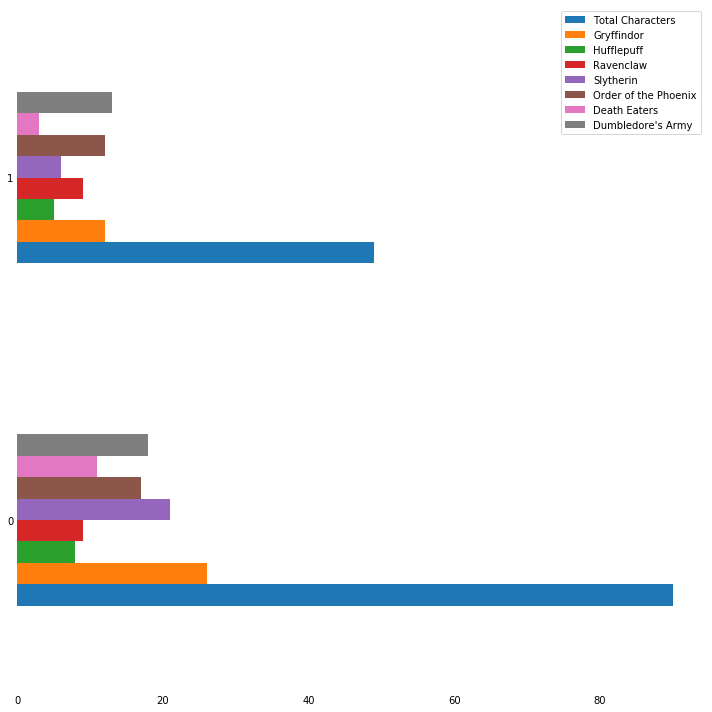

In [74]:
df.plot(kind= 'barh',figsize=(10,10) )

ax1 = plt.axes()
#x_axis = ax1.axes.get_xaxis()
ax1.tick_params(axis=u'both', which=u'both',length=0)
x_axis.set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('gender.pdf')

In [109]:
df1counts['index'] = df1counts['index'].str.upper()
df_book_counts = df1counts.merge(df2counts,on=['index'], how = 'outer')

In [116]:
df_book_counts= df_book_counts.merge(df3counts,on=['index'], how = 'outer')

In [122]:
df_book_counts = df_book_counts.sort_values(by='book3', ascending = False).head(29)

In [140]:
df_book_counts

,index,book1,book2,book3
0,HARRY,330.0,390.0,308.0
81,LUPIN,NaN,NaN,207.0
3,HERMIONE,173.0,122.0,193.0
2,RON,210.0,175.0,151.0
1,HAGRID,215.0,82.0,97.0
4,DUMBLEDORE,75.0,88.0,76.0
82,SIRIUS,NaN,NaN,70.0
10,SNAPE,33.0,27.0,61.0
65,FUDGE,NaN,10.0,55.0
83,TRELAWNEY,NaN,NaN,39.0


In [144]:
import plotly.graph_objects as go



fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_book_counts['book1'],
    y=df_book_counts['index'],
    marker=dict(color="crimson", size=12),
    mode="markers",
    name="Book 1",
))
fig.add_trace(go.Scatter(
    x=df_book_counts['book2'],
    y=df_book_counts['index'],
    marker=dict(color="gold", size=12),
    mode="markers",
    name="Book 2",
       ))

fig.add_trace(go.Scatter(
    x=df_book_counts['book3'],
    y=df_book_counts['index'],
    marker=dict(color="blue", size=12),
    mode="markers",
    name="Book 3",
       ))


fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)
fig.show()

fig.show()


In [134]:
! pip install plotly

    100% |████████████████████████████████| 6.8MB 4.9MB/s eta 0:00:01
sqlalchemy-migrate 0.12.0 has requirement SQLAlchemy>=0.9.6, but you'll have sqlalchemy 0.7.10 which is incompatible.
  Running setup.py install for retrying ... done
You are using pip version 10.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
